In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
da=pd.read_csv('Data.csv')
da

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [3]:
print (da.info())
print ('----------------------------------------------')
print (da.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      919 non-null    float64
 1   Market_dist    919 non-null    float64
 2   Hospital_dist  931 non-null    float64
 3   Carpet_area    924 non-null    float64
 4   Builtup_area   917 non-null    float64
 5   Parking_type   932 non-null    object 
 6   City_type      932 non-null    object 
 7   Rainfall       932 non-null    int64  
 8   Price_house    932 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB
None
----------------------------------------------
          Taxi_dist   Market_dist  Hospital_dist   Carpet_area  Builtup_area  \
count    919.000000    919.000000     931.000000    924.000000    917.000000   
mean    8229.727965  11018.752992   13072.092374   1511.862554   1794.924755   
std     2561.985008   2543.920590    2586.456161    790.9

## Handling The missing values for column 'Builtup_area'

In [4]:
da.isna().sum()

Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area     15
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

In [5]:
index_li=[]
for i in range(len(da)):
    if str(da['Builtup_area'][i])=='nan':
        index_li.append(i)

In [6]:
index_li

[19, 28, 42, 83, 95, 158, 196, 279, 358, 381, 425, 551, 811, 845, 869]

In [7]:
Buliub_miss=da.iloc[index_li,:]
Buliub_miss

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
19,6209.0,7839.0,10660.0,1837.0,NaN,Open,CAT B,790,4922000
28,7186.0,8400.0,11151.0,1226.0,NaN,Open,CAT C,760,4766000
42,8525.0,11543.0,13589.0,1209.0,NaN,Open,CAT A,1200,6041000
83,11703.0,12778.0,16910.0,1598.0,NaN,Covered,CAT A,530,8116000
95,6541.0,7537.0,11474.0,1694.0,NaN,Covered,CAT B,560,4830000
158,3761.0,7646.0,7251.0,1514.0,NaN,No Parking,CAT C,440,5485000
196,8509.0,12981.0,13230.0,1902.0,NaN,Open,CAT A,590,10112000
279,2480.0,12328.0,8774.0,1328.0,NaN,Open,CAT B,490,5849000
358,8395.0,12052.0,12398.0,2215.0,NaN,Covered,CAT B,990,6424000
381,8873.0,10762.0,14213.0,1636.0,NaN,Open,CAT B,710,6721000


In [8]:
da['Builtup_area'].fillna(pd.to_numeric(da['Builtup_area']).median(),inplace=True)

In [9]:
da.isna().sum()

Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area      0
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

## See if ther an outlayer on the data 

C:\Users\omark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Builtup_area'>

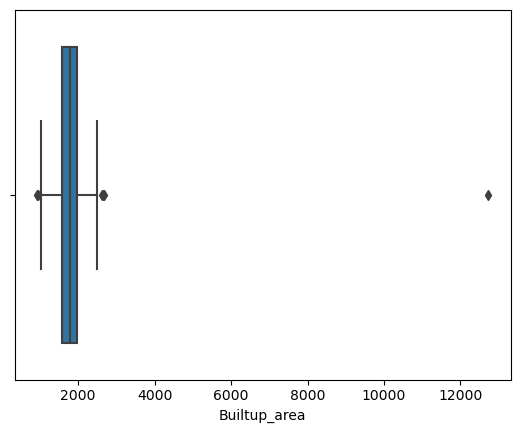

In [10]:
sb.boxplot(da['Builtup_area'])

In [11]:
da[da['Builtup_area']== da['Builtup_area'].max()] # to get a specific Row in the Data Set


,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
360,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,150000000


In [12]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [13]:
data_outliers=detect_outliers_iqr(da['Builtup_area'])
print ('Outliers from IQR : ' ,data_outliers)

Outliers from IQR :  [932.0, 951.0, 2617.0, 2647.0, 2667.0, 12730.0]


In [27]:
median = da['Builtup_area'].median()# Replace with median
data=np.array(da['Builtup_area'])
# print (data)
for i in range(len(data)):
    if data[i] in data_outliers:
        da.replace(data[i],median,inplace=True)
        
print("data : ", da['Builtup_area'])
print("New array: ",data)
# print(x.dtype)

data :  0      1961.0
1      1752.0
2      1609.0
3      1748.0
4      2111.0
        ...  
927    1910.0
928    1663.0
929    1436.0
930    1560.0
931    1429.0
Name: Builtup_area, Length: 932, dtype: float64
New array:  [1961. 1752. 1609. 1748. 2111. 1733. 1858. 1507. 1321. 1235. 1439. 2098.
 2064. 1931. 1756. 1950. 1907. 2045. 1731. 1774. 2340. 1700. 1746. 2065.
 1752. 1488. 2073. 1777. 1774. 1648. 1943. 2071. 1746. 1508. 1608. 2163.
 1648. 2230. 1744. 1411. 2204. 1516. 1774. 1725. 1152. 2001. 2117. 1194.
 1471. 1885. 2087. 1982. 1776. 1688. 1820. 1880. 1288. 2240. 1898. 1701.
 2060. 1763. 2104. 2070. 2045. 1614. 2391. 1748. 1561. 1821. 2052. 2262.
 1681. 1941. 1576. 2019. 1380. 1073. 1749. 1833. 1956. 1520. 1475. 1774.
 2044. 1761. 1711. 1858. 1723. 1884. 1525. 1760. 2342. 1506. 1468. 1774.
 1758. 1912. 1774. 2205. 1655. 2305. 2385. 2235. 2171. 2147. 1899. 1321.
 2294. 1500. 1655. 1587. 1434. 2031. 2311. 1878. 1700. 1382. 1787. 2248.
 1927. 2287. 1503. 1379. 2046. 1798. 2017. 1727.

Text(0.5, 0, 'Sample')

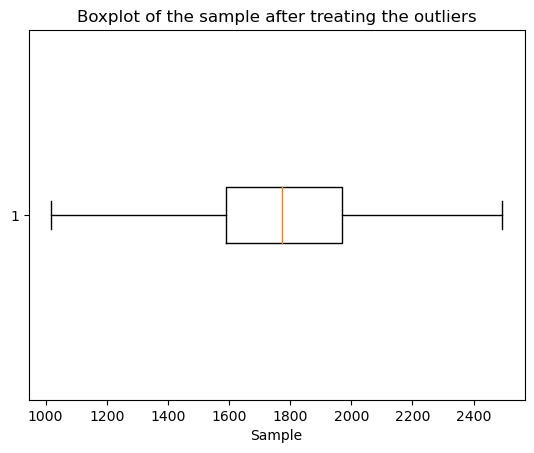

In [28]:
plt.boxplot(data, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

In [29]:
data_outliers=detect_outliers_iqr(da['Price_house'])
print ('Outliers from IQR : ' ,data_outliers)

Outliers from IQR :  [932.0, 951.0, 2617.0, 2647.0, 2667.0, 12730.0, 30000, 11632000, 150000000]


In [30]:
median = da['Price_house'].median()# Replace with median
data=np.array(da['Price_house'])
# print (data)
for i in range(len(data)):
    if data[i] in data_outliers:
        da.replace(data[i],median,inplace=True)
        
print("data : ", da['Price_house'])
print("New array: ",data)

data :  0      6649000
1      3982000
2      5401000
3      5373000
4      4662000
        ...   
927    6639000
928    8208000
929    7644000
930    9661000
931    5434000
Name: Price_house, Length: 932, dtype: int64
New array:  [ 6649000  3982000  5401000  5373000  4662000  4526000  7224000  3772000
  4631000  4415000  7128000  5762000  6047000  5913000  6636000  7887000
  7725000  3817000  6354000  4922000  4019000  4346000  6889000  5278000
  5068000  4188000  7005000  2582000  4766000  6053000  7810000  8486000
  8014000  1492000  6046000  7456000  7243000  4546000  4157000  6287000
  5517000  4548000  6041000  4955000  4814000  6764000  3973000  3580000
  4927000  6707000  6651000  6253000  5998000  7635000  8182000  5783000
  7045000  6700000  6409000  4867000  6621000  8366000  7077000  5387000
  7130000  7669000  4610000  4910000  6592000  5866000  6913000  4908000
  7271000  3343000  4243000  5665000  3358000  6737000  7178000  8484000
  8207000  2677000  6556000  8116000  38

Text(0.5, 0, 'Price_house')

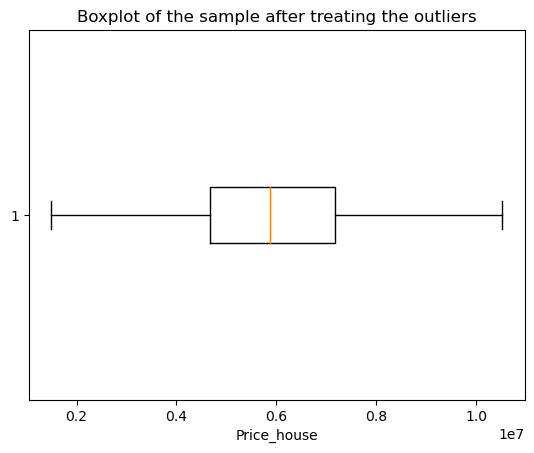

In [31]:
plt.boxplot(data, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Price_house")

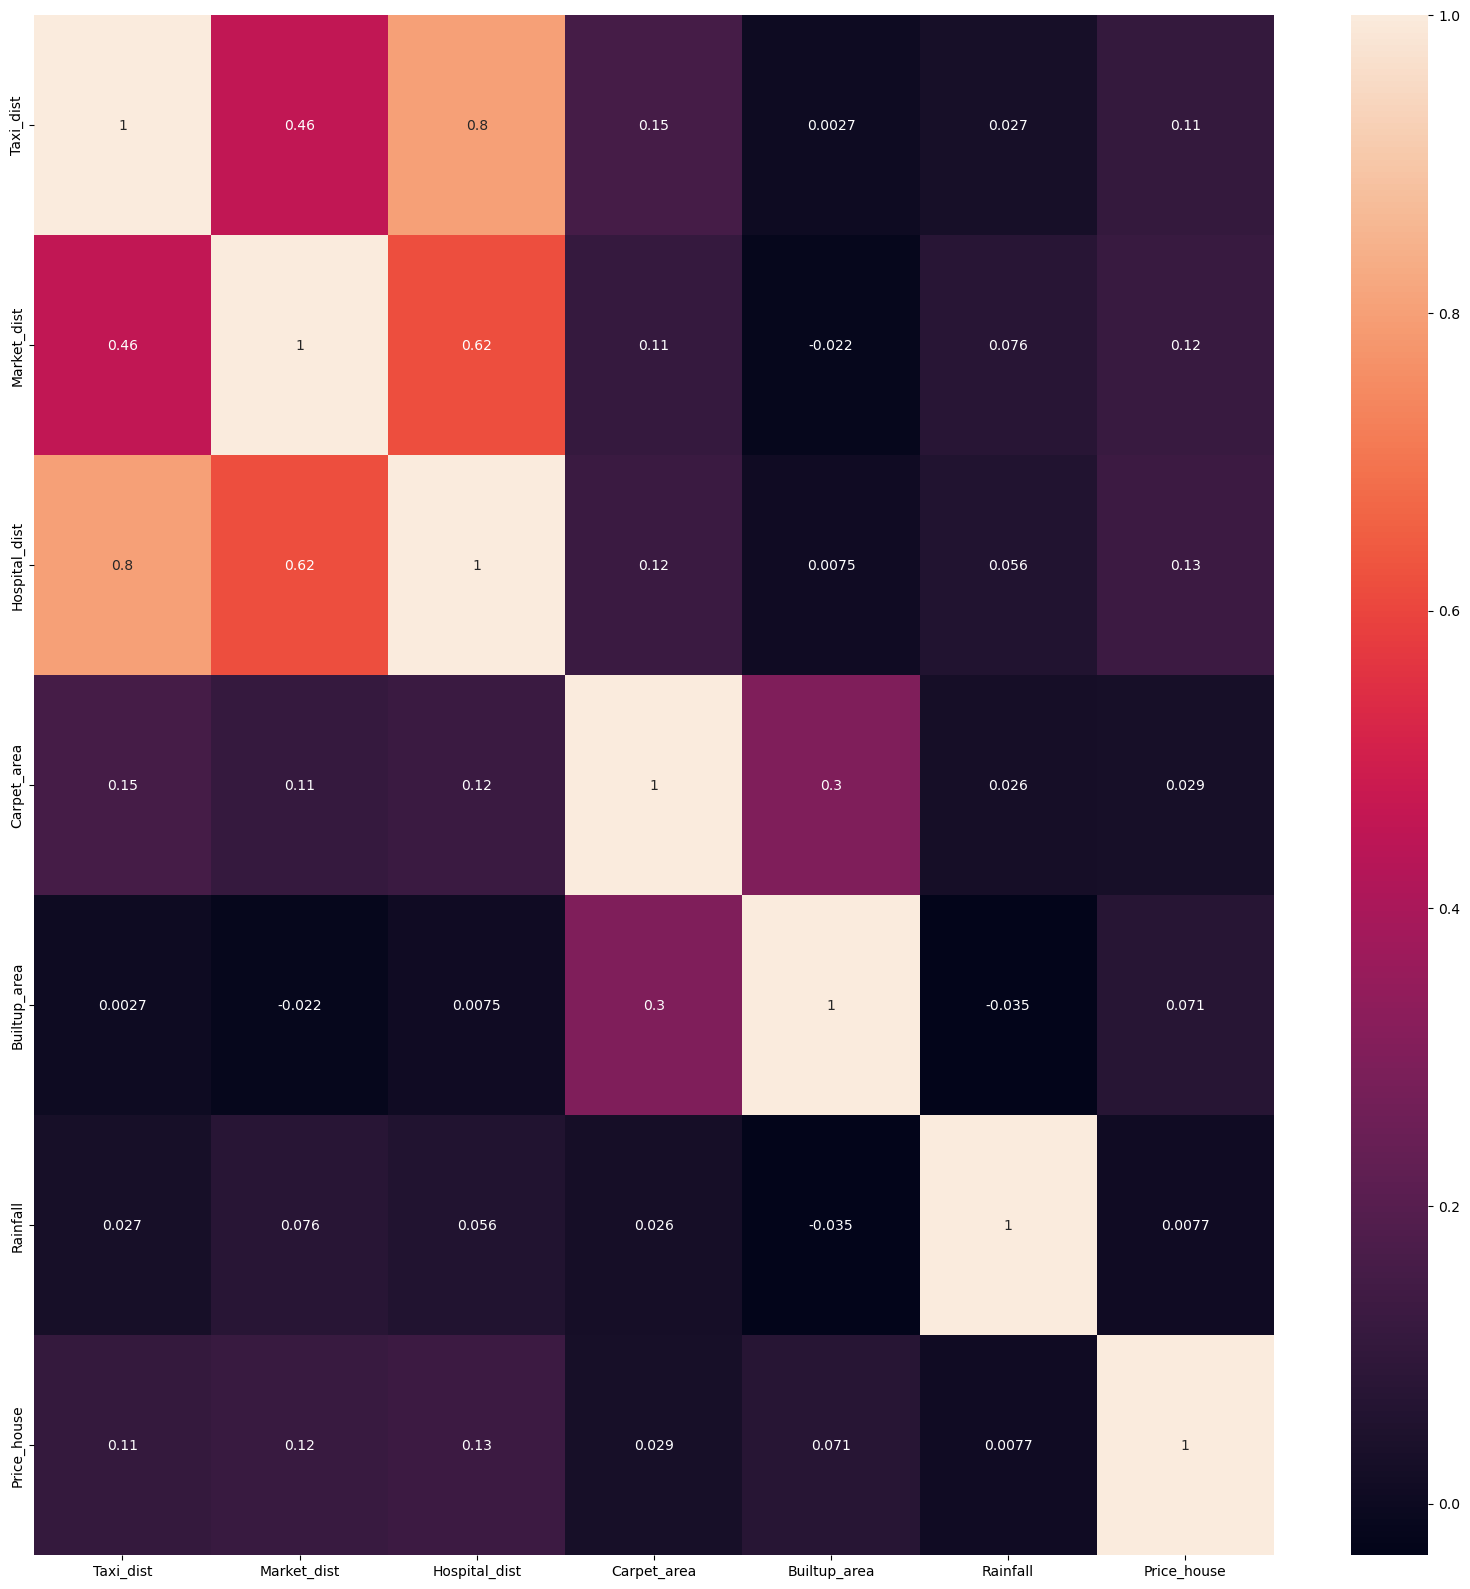

In [19]:
plt.figure(figsize=(20,20))
sb.heatmap(da.corr(),annot=True)
plt.show()

Text(0, 0.5, 'Price_house')

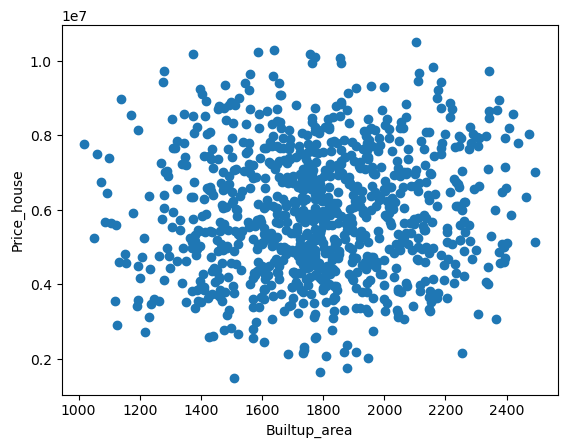

In [20]:
plt.scatter(da['Builtup_area'],da['Price_house'])
plt.xlabel('Builtup_area')
plt.ylabel('Price_house')

In [21]:
da.insert(1,'Ones',1)
da

,Taxi_dist,Ones,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,1,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,1,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,1,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,1,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,1,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
927,12176.0,1,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,1,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,1,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,1,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [22]:
x=da.loc[:,['Builtup_area','Ones']]
x

,Builtup_area,Ones
0,1961.0,1
1,1752.0,1
2,1609.0,1
3,1748.0,1
4,2111.0,1
...,...,...
927,1910.0,1
928,1663.0,1
929,1436.0,1
930,1560.0,1


In [23]:
y=da.loc[:,['Price_house']]
y

,Price_house
0,6649000
1,3982000
2,5401000
3,5373000
4,4662000
...,...
927,6639000
928,8208000
929,7644000
930,9661000


In [24]:
minvalue=x.loc[:,'Builtup_area'].min()
maxvalue=x.loc[:,'Builtup_area'].max()
x.loc[:,'Builtup_area']=(x.loc[:,'Builtup_area']-minvalue)/(maxvalue-minvalue)
print ('X After normalization ')
x

X After normalization 


,Builtup_area,Ones
0,0.639322,1
1,0.497627,1
2,0.400678,1
3,0.494915,1
4,0.741017,1
...,...,...
927,0.604746,1
928,0.437288,1
929,0.283390,1
930,0.367458,1


In [25]:
x=np.array(x)
y=np.array(y)
theta=np.zeros(2)
print(theta,theta.shape)

[0. 0.] (2,)


# Cost Function

In [26]:
# to calculate the error rate
m= len(y)
def Cost_func(x,y,theta):
    j=np.sum((x.dot(theta)-y)**2)/2/m
    return j
cost1= Cost_func(x,y,theta)
print (cost1)

1.7742789959000002e+16


# Gradint Descent

In [32]:
# to reduce the cost function
def gradient_descent(x,y,theta,alpha,iterations):
    cost_history=np.zeros(iterations)
    for it in range(iterations):
        hypothesis=x.dot(theta)
        loss=hypothesis.reshape(-1,1)-y
        gradient=np.dot(x.T,loss)/m
        theta=theta.reshape(-1,1)-(alpha*gradient)
        cost=Cost_func(x,y,theta)
        cost_history[it]=cost
    return theta,cost_history

In [33]:
(t,c)=gradient_descent(x,y,theta,0.000001,200)
print(t)

[[ 618.84571916]
 [1185.87414713]]


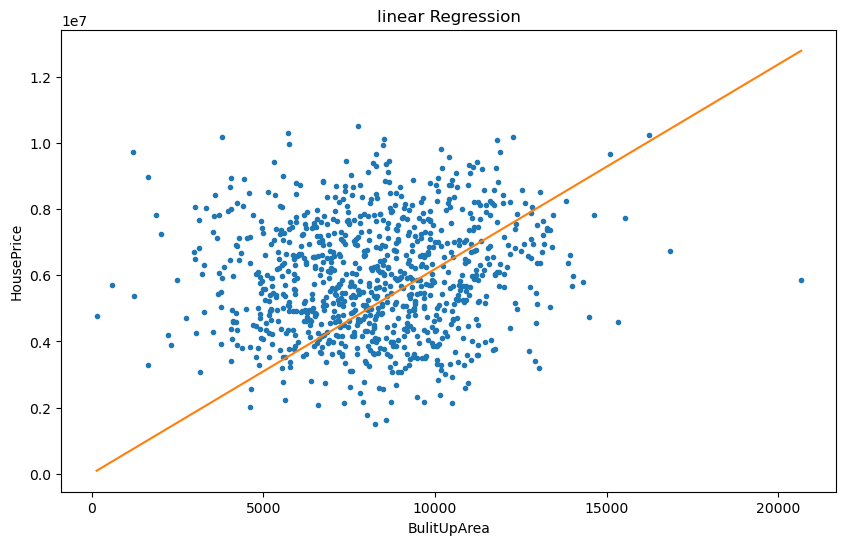

In [34]:
best_fit_x=np.linspace(da.iloc[:,0].min(), da.iloc[:,0].max(), 400)
best_fit_y=[t[1]+t[0]*xx for xx in best_fit_x]
plt.figure(figsize=(10,6))
plt.plot(da.iloc[:,0],y,'.')
plt.plot(best_fit_x,best_fit_y,'-')
plt.xlabel('BulitUpArea')
plt.ylabel('HousePrice')
plt.title('linear Regression')
plt.show()